In [1]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.1/480.1 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 6.8 MB/s eta 0:00:00

In [2]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp39-cp39-linux_x86_64.whl size=12062408 sha256=7c499b4bc40145cdbe6d1dcec28ee50710177f01cca7cab2eb128f528062f886
  Stored in directory: /root/.cache/pip/wheels/88/5f/33/d7b8943eba74fdfbd535c83cefcf366c25b0f9cb6424e763e7
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc9 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
plotnine 0.10.1 requires matpl

# Importing Libraries

In [3]:
from pycaret.classification import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Step 1. Data Importing

In [44]:
df=pd.read_excel('Colleges_and_Universities_SCRUBJan1211 - January 31^J 11_17 AM.xlsx',sheet_name='Final Sheet')
df.head()

,NAME,Rank,ADDRESS,CITY,STATE,ZIP,Region,Region code1.1,Research Status,STATUS,...,Breach 2-Summary,Breach 2-Year,Remarks3,Breach 3-Actor,Breach 3-URL,Breach 3-Summary,Breach 3-Year,Remarks4,Breach 4-Actor,Breach 4-URL
0,A T STILL UNIVERSITY OF HEALTH SCIENCES,NaN,800 W JEFFERSON,KIRKSVILLE,MO,63501,Midwest,Plains,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AANIIIH NAKODA COLLEGE,NaN,269 BLACKFEET AVENUE AGENCY,HARLEM,MT,59526,West,Rocky Mountains,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PRINCETON UNIVERSITY,1,1 NASSAU HALL,PRINCETON,NJ,8544,Northeast,Mid East,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABRAHAM LINCOLN UNIVERSITY,NaN,"100 WEST BROADWAY, SUITE 600",GLENDALE,CA,91210,West,Far West,3,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACADEMY COLLEGE,NaN,"1600 W. 82ND STREET, SUITE 100",BLOOMINGTON,MN,55431,Midwest,Plains,3,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 2. Data Processing

In [45]:
df=df[['Rank','STATE','Region code1.1','Research Status','INST_SIZE','Region','STATUS','medical','hbcu','hsi','womens','CyberAttack Found']]

# Steps 3 and 4. Data Summaries and Graphing

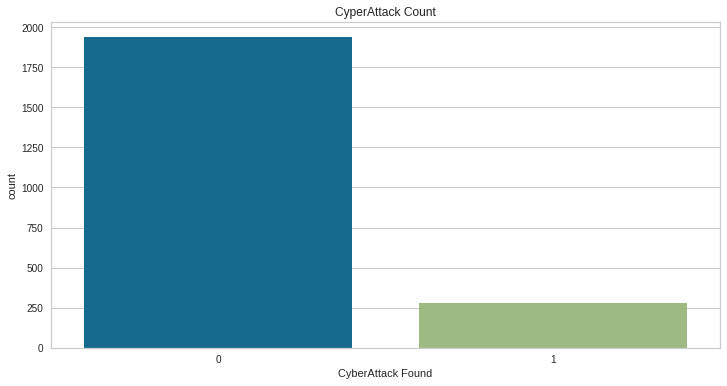

In [46]:
# CyperAttack destribution in the data
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('CyperAttack Count')
sns.countplot(df['CyberAttack Found'])
plt.show()

### * Here we found the the data is imbalanced

In [47]:
# Rank values 
print(df['Rank'].value_counts())
print("Count of Rank: ",len(df['Rank'].value_counts()))

331-440    106
263         22
299         17
234         16
219         15
151         15
285         14
137         14
250         12
317         12
182         10
127         10
105         10
166          9
202          9
194          8
89           7
55           7
212          7
83           6
176          6
115          6
97           6
77           5
62           5
67           5
72           5
44           5
121          5
25           4
51           4
29           3
38           3
3            3
22           3
41           2
49           2
34           2
32           2
36           2
20           2
18           2
13           2
10           2
7            2
15           2
1            1
9            1
17           1
12           1
2            1
6            1
Name: Rank, dtype: int64
Count of Rank:  52


### * There are 52 different rank so we can't use it as categorical column. we can use it as contious or don't use it

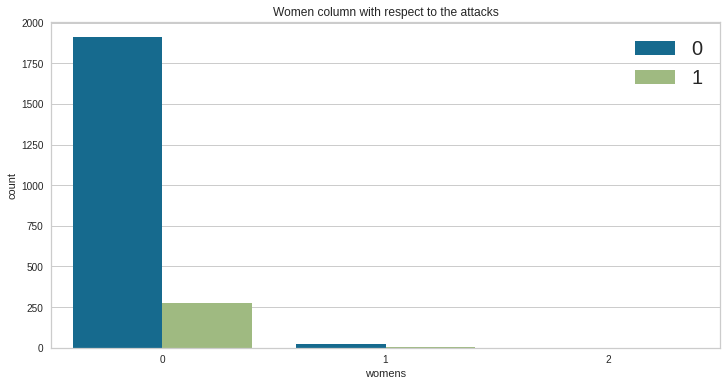

In [48]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('CyperAttack Count')
sns.countplot(data=df,hue='CyberAttack Found',x='womens')
plt.title("Women column with respect to the attacks")
plt.legend(loc='upper right',fontsize=20)
plt.show()

In [49]:
df['womens'].value_counts()

0    2185
1      28
2       1
Name: womens, dtype: int64

In [50]:
df=df[df['womens'] != 2]

### * There is an 1 outlier in womens column with value 2 so we have to delete it

In [51]:
df['Region code1.1'].value_counts()

Southeast             522
Mid East              428
Great Lakes           326
Far West              293
Plains                225
Southwest             184
New England           163
Rocky Mountains        65
US Service schools      7
Name: Region code1.1, dtype: int64

In [52]:
df['Region'].value_counts()

South        739
Midwest      554
Northeast    539
West         381
Name: Region, dtype: int64

In [53]:
df['STATE'].value_counts()

CA    210
NY    199
PA    124
TX    117
IL     85
OH     84
FL     83
MA     82
NC     68
MO     65
VA     63
GA     62
IN     56
MI     55
NJ     52
TN     50
MN     48
WI     48
SC     36
KY     35
IA     35
MD     34
WA     33
AL     33
KS     31
CO     31
OK     30
LA     27
OR     25
AR     25
CT     23
WV     22
NE     22
AZ     22
ME     18
MS     18
DC     17
NH     16
SD     15
NM     14
MT     14
RI     13
VT     12
UT     11
NV     10
ND     10
ID      9
HI      9
AK      6
DE      5
WY      1
Name: STATE, dtype: int64

### * That is too much category in state so we can't use it or we can do weigh of evidence and group each similar states

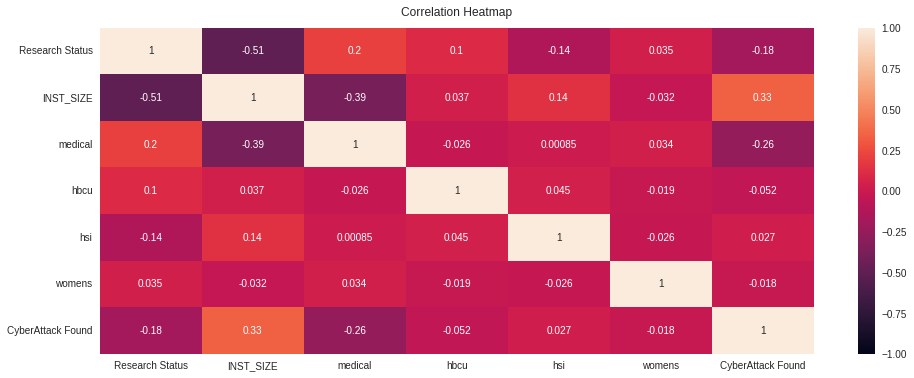

In [54]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### * Here we found the top correlation with the target variable is INST_SIZE

In [55]:
df.isnull().sum()

Rank                 1792
STATE                   0
Region code1.1          0
Research Status         0
INST_SIZE               0
Region                  0
STATUS                  0
medical                 0
hbcu                    0
hsi                     0
womens                  0
CyberAttack Found       0
dtype: int64

In [56]:
df.isnull().sum()/len(df)

Rank                 0.809761
STATE                0.000000
Region code1.1       0.000000
Research Status      0.000000
INST_SIZE            0.000000
Region               0.000000
STATUS               0.000000
medical              0.000000
hbcu                 0.000000
hsi                  0.000000
womens               0.000000
CyberAttack Found    0.000000
dtype: float64

### * 80% of the Rank column is missing so it's better to work without it

# Feature importance

In [57]:
df_dummy=pd.get_dummies(data=df, columns=['Region code1.1','Research Status','womens','STATUS','Region'], drop_first=True)

In [58]:
# defining the dependent and independent variables

Xtrain = df_dummy.drop(columns=['Rank','CyberAttack Found','STATE'])
ytrain = df_dummy['CyberAttack Found']

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)

scaled_features_df = pd.DataFrame(Xtrain, index=df_dummy.drop(columns=['Rank','CyberAttack Found','STATE']).index, columns=df_dummy.drop(columns=['Rank','CyberAttack Found','STATE']).columns)
# building the model and fitting the data
log_reg = sm.Logit(ytrain, scaled_features_df).fit()

Optimization terminated successfully.
         Current function value: 0.661320
         Iterations 5


In [59]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:      CyberAttack Found   No. Observations:                 2213
Model:                          Logit   Df Residuals:                     2193
Method:                           MLE   Df Model:                           19
Date:                Wed, 08 Mar 2023   Pseudo R-squ.:                 -0.7537
Time:                        21:58:45   Log-Likelihood:                -1463.5
converged:                       True   LL-Null:                       -834.52
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
INST_SIZE                             0.3972      0.059      6.765      0.000       0.282       0.512
medical                              -0.2433      0.054     -4

### Here we see the significant features are (INST_SIZE,medical,hbcu,hsi)

# Pycaret analysis

In [20]:
df.drop(columns=['Rank','STATE'],inplace=True)

In [21]:
exp_name = setup(data = df,categorical_features=['Region code1.1','Research Status','womens','STATUS','Region'],  target = 'CyberAttack Found')

,Description,Value
0,Session id,5638
1,Target,CyberAttack Found
2,Target type,Binary
3,Original data shape,"(2213, 10)"
4,Transformed data shape,"(2213, 25)"
5,Transformed train set shape,"(1549, 25)"
6,Transformed test set shape,"(664, 25)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,5


# Sorting result of the models based on AUC

In [22]:
best=exp_name.compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8786,0.7640,0.1700,0.6145,0.2589,0.2137,0.2709,1.0670
ada,Ada Boost Classifier,0.8761,0.7657,0.1650,0.5891,0.2473,0.2012,0.2554,0.4270
ridge,Ridge Classifier,0.8754,0.0000,0.0824,0.5706,0.1347,0.1068,0.1679,1.0120
dummy,Dummy Classifier,0.8748,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1880
dt,Decision Tree Classifier,0.8728,0.6092,0.1855,0.5076,0.2659,0.2121,0.2476,0.4380
gbc,Gradient Boosting Classifier,0.8722,0.7486,0.1492,0.5221,0.2235,0.1752,0.2202,0.5400
lda,Linear Discriminant Analysis,0.8702,0.7661,0.2584,0.4886,0.3252,0.2629,0.2845,0.4070
rf,Random Forest Classifier,0.8696,0.6609,0.1855,0.4726,0.2602,0.2034,0.2331,1.2350
knn,K Neighbors Classifier,0.8683,0.6648,0.1555,0.5179,0.2235,0.1716,0.2131,0.5260
et,Extra Trees Classifier,0.8677,0.6202,0.1650,0.4347,0.2340,0.1782,0.2049,0.5970


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### * Logistic regression is the best model

# Feature importance using best pycaret model

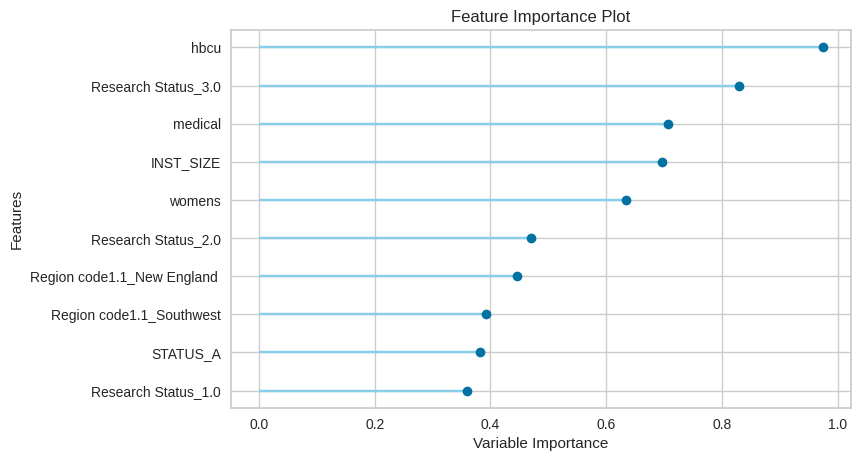

In [23]:
plot_model(best, plot = 'feature')

### Top feature importance (hbcu,Research status_3.0,INS_SIZE,medical)

# Tuning The best model with 50 iteration

In [24]:
lr = create_model('lr')

# tune model
tuned_lr = tune_model(lr,optimize = 'Accuracy', n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8516,0.8297,0.1579,0.3000,0.2069,0.1337,0.1421
1,0.8903,0.7496,0.1579,0.7500,0.2609,0.2280,0.3114
2,0.8774,0.8086,0.1579,0.5000,0.2400,0.1925,0.2309
3,0.8774,0.7649,0.2105,0.5000,0.2963,0.2412,0.2685
4,0.8839,0.7305,0.1053,0.6667,0.1818,0.1535,0.2331
5,0.8710,0.6833,0.2500,0.5000,0.3333,0.2706,0.2906
6,0.8710,0.7506,0.1000,0.5000,0.1667,0.1292,0.1801
7,0.8645,0.7400,0.1500,0.4286,0.2222,0.1665,0.1943
8,0.8968,0.8626,0.2000,1.0000,0.3333,0.3034,0.4229


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8581,0.8328,0.2105,0.3636,0.2667,0.1942,0.2032
1,0.8839,0.7469,0.1579,0.6000,0.2500,0.2096,0.2658
2,0.8774,0.8057,0.1579,0.5000,0.2400,0.1925,0.2309
3,0.8774,0.7688,0.2105,0.5000,0.2963,0.2412,0.2685
4,0.8839,0.7293,0.1053,0.6667,0.1818,0.1535,0.2331
5,0.8774,0.6848,0.3000,0.5455,0.3871,0.3253,0.3433
6,0.8710,0.7557,0.1000,0.5000,0.1667,0.1292,0.1801
7,0.8645,0.7359,0.1500,0.4286,0.2222,0.1665,0.1943
8,0.8968,0.8644,0.2000,1.0000,0.3333,0.3034,0.4229


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


# Compare base and tuned model

In [25]:
# default model
print(lr)

# tuned model
print(tuned_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5638, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=2.321, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5638, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


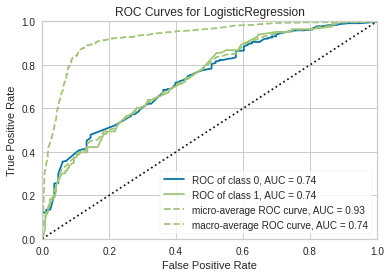

In [26]:
plot_model(tuned_lr)

In [27]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Confusion matrix

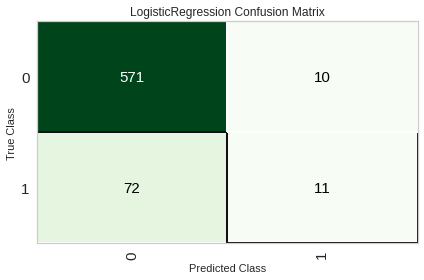

In [31]:
plot_model(tuned_lr, plot = 'confusion_matrix')

# Predictions

In [32]:
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8765,0.7360,0.1325,0.5238,0.2115,0.1696,0.2179


,Region code1.1,Research Status,INST_SIZE,Region,STATUS,medical,hbcu,hsi,womens,CyberAttack Found,prediction_label,prediction_score
1549,Great Lakes,2,3,Midwest,A,1,2,0,0,1,0,0.7495
1550,Southwest,1,2,South,A,1,2,0,0,0,0,0.8759
1551,Far West,2,2,South,A,2,2,0,0,0,0,0.8271
1552,Rocky Mountains,1,5,West,A,1,2,0,0,1,1,0.5985
1553,Great Lakes,1,2,Midwest,A,2,2,0,0,0,0,0.9332
...,...,...,...,...,...,...,...,...,...,...,...,...
2208,Southeast,2,3,South,A,2,2,0,0,0,0,0.8389
2209,Southeast,2,1,South,A,2,2,0,0,0,0,0.9545
2210,Far West,3,2,West,A,2,2,0,0,0,0,0.9730
2211,Far West,1,2,West,A,2,2,0,0,0,0,0.9076


In [33]:
predictions = predict_model(tuned_lr, data=df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8812,0.7696,0.1769,0.5833,0.2715,0.2264,0.2750


,Region code1.1,Research Status,INST_SIZE,Region,STATUS,medical,hbcu,hsi,womens,CyberAttack Found,prediction_label,prediction_score
0,Plains,2,2,Midwest,A,1,2,0,0,0,0,0.8400
1,Rocky Mountains,1,1,West,A,2,2,0,0,0,0,0.9575
2,Mid East,2,3,Northeast,A,2,2,0,0,1,0,0.8609
3,Far West,3,1,West,A,2,2,0,0,0,0,0.9864
4,Plains,3,1,Midwest,A,2,2,0,0,0,0,0.9890


# Saving Tuned Model

In [28]:
save_model(tuned_lr, 'Final Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Research Status', 'INST_SIZE',
                                              'medical', 'hbcu', 'hsi',
                                              'womens'],
                                     transformer=SimpleImputer(add_indicato...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                                               return_df=True,
                                                               use_cat_names=True,
                        

# Summary

* After statistical analysis techniques using stats model the significant features that affect on risk (INST_SIZE,medical,hbcu,hsi)
* The Top risk factors using Pycaret (hbcu,Research status_3.0,INS_SIZE,medical)
* Logistic regression the most accurate in detecting the presence of risk factors in educational institutions.
* At the evaluation the AUC = 0.79 and if we need to increase it we can increase the data specially class 1 and we can try smote for the imbalance data to over or under sample it

# AutoGluon Predictors

In [35]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 KB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [60]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, ytrain, test_size=0.2, random_state=42,stratify=ytrain)

In [62]:
X_train['class']=y_train
X_test['class']=y_test

In [63]:
train_data = TabularDataset(X_train)

In [64]:
predictor = TabularPredictor(label="class").fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20230308_220041/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230308_220041/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    1770
Train Data Columns: 20
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10970.92 MB
	Train Data (Original)  

In [65]:
test_data = TabularDataset(X_test)

In [66]:
leaderboard = predictor.leaderboard(test_data)

                  model  score_test  score_val  pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2    0.880361   0.898305        0.059127       0.028768  4.331205                 0.006502                0.002192           1.326360            2       True         14
1              CatBoost    0.878104   0.887006        0.006494       0.002824  0.537935                 0.006494                0.002824           0.537935            1       True          7
2               XGBoost    0.878104   0.875706        0.020453       0.007266  0.529385                 0.020453                0.007266           0.529385            1       True         11
3        ExtraTreesEntr    0.878104   0.875706        0.162155       0.074943  0.860655                 0.162155                0.074943           0.860655            1       True          9
4            LightGBMXT    0.875847   0.88700

# Feature Importance

In [70]:
predictor.feature_importance(X_train)

Computing feature importance via permutation shuffling for 20 features using 1770 rows with 5 shuffle sets...
	12.7s	= Expected runtime (2.54s per shuffle set)
	5.03s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
INST_SIZE,0.019096,0.003105,0.000081,5,0.025489,0.012703
medical,0.014011,0.001158,0.000006,5,0.016395,0.011627
hbcu,0.006102,0.001288,0.000225,5,0.008754,0.003449
Research Status_2,0.003616,0.001723,0.004679,5,0.007163,0.000068
Region code1.1_New England,0.003277,0.001516,0.004220,5,0.006398,0.000155
Region_West,0.003164,0.001172,0.001896,5,0.005576,0.000752
Region_South,0.003051,0.000857,0.000674,5,0.004815,0.001287
Region code1.1_Mid East,0.002938,0.001288,0.003494,5,0.005591,0.000285
Region code1.1_Southeast,0.002825,0.000799,0.000692,5,0.004470,0.001180
Region_Northeast,0.002034,0.001473,0.018341,5,0.005067,-0.001000


In [68]:
predictor.save('AutoGluon.pkl')

# Summary
AutoGluon Predictors gives improvement more than pycaret in model WeightedEnsemble_L2